In [9]:
%matplotlib inline

import os
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
# View all available strategies
print(RunManager.get_strategies())
print(RunManager.get_run_names('StatArbStrategy'))

['AnalystEstimates', 'IntradayReversion', 'LongPeadStrategy', 'PostErnStrategy', 'SIRank', 'StatArbStrategy', 'StatArbStrategy2']
         Run  RunDate  Completed  \
0   run_0021      NaN        NaN   
1   run_0022      NaN        NaN   
2   run_0023      NaN        NaN   
3   run_0024      NaN        NaN   
4   run_0025      NaN        NaN   
5   run_0026      NaN        NaN   
6   run_0027      NaN        NaN   
7   run_0028      NaN        NaN   
8   run_0029      NaN        NaN   
9   run_0030      NaN        NaN   
10  run_0031      NaN        NaN   
11  run_0032      NaN        NaN   
12  run_0033      NaN        NaN   
13  run_0034      NaN        NaN   
14  run_0035      NaN        NaN   
15  run_0036      NaN        NaN   
16  run_0037      NaN        NaN   
17  run_0038      NaN        NaN   
18  run_0039      NaN        NaN   
19  run_0040      NaN        NaN   
20  run_0041      NaN        NaN   
21  run_0042      NaN        NaN   
22  run_0043      NaN        NaN   

     

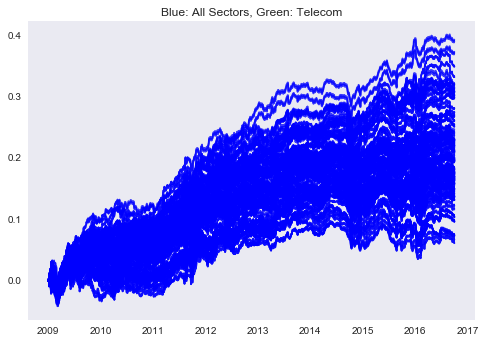

In [3]:
rm1 = RunManager('StatArbStrategy', 'run_0021', 2009)
#rm2 = RunManager('StatArbStrategy', 'run_0043', 2009)

rm1.import_return_frame()
#rm2.import_return_frame()

plt.figure()
plt.title('Blue: All Sectors, Green: Telecom')
plt.plot(rm1.returns.cumsum(), 'b', alpha=.5)
#plt.plot(rm2.returns.cumsum(), 'g', alpha=.5)

plt.grid()
plt.show()

In [4]:
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,avg_holding_days,avg_perc_gain,avg_rebalance_count,max_holding_days,max_perc_gain,max_rebalance_count,min_perc_gain,total_trades
0,account_max_diff,False,192,0.200822,0.052960,3.892071,0.000760,0.026349,6.5,0.063348,0.764678,-0.074433,673.964226
1,account_max_diff,True,192,0.200822,0.052960,3.892071,0.000760,0.026349,6.5,0.063348,0.764678,-0.074433,673.964226
2,max_holding_days,10,192,0.225880,0.060318,5.147183,0.000990,0.045250,10.0,0.066293,1.048085,-0.083563,463.449074
3,max_holding_days,3,192,0.175765,0.045602,2.636959,0.000530,0.007448,3.0,0.060403,0.481271,-0.065302,884.479377
4,max_pairs,3000,384,0.200822,0.052960,3.892071,0.000760,0.026349,6.5,0.063348,0.764678,-0.074433,673.964226
5,max_pos_prop,0.03,192,0.179380,0.051588,3.831214,0.000709,0.025783,6.5,0.064253,0.788194,-0.075636,680.567130
6,max_pos_prop,0.06,192,0.222265,0.054332,3.952928,0.000811,0.026915,6.5,0.062443,0.741162,-0.073229,667.361322
7,n_pairs,100,128,0.206596,0.053923,3.920653,0.000771,0.026754,6.5,0.063364,0.762153,-0.073865,572.207386
8,n_pairs,200,128,0.188407,0.051996,3.842248,0.000725,0.025170,6.5,0.070807,0.852588,-0.082370,1163.135101
9,n_pairs,50,128,0.207464,0.052961,3.913312,0.000783,0.027124,6.5,0.055873,0.679293,-0.067063,286.550189


In [5]:
comb = CombinationSearch()
comb.add_run(rm1)
comb.start(10)

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [01:24<00:00,  8.84s/it]


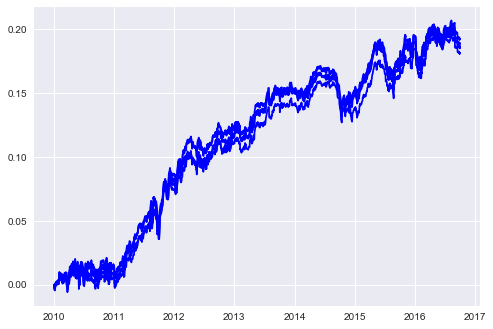

In [6]:
x2 = comb.best_results_rets.dropna()
plt.figure()
plt.plot(x2.cumsum(), 'b')
plt.show()


In [11]:
rollup_returns(x2).sum(axis=1)

Year
2010    0.015057
2011    0.068102
2012    0.037661
2013    0.031132
2014   -0.000087
2015    0.042320
2016   -0.007957
dtype: float64

In [17]:
# ~~~~~~ RunAggregator ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ra = RunAggregator()

# ra.add_run(rm1)
ra.add_run(rm1)
ra.add_run(rm3)

returns = ra.aggregate_returns()

In [24]:
returns.iloc[700:].mean() * 252

StatArbStrategy_run_0028_0      0.029027
StatArbStrategy_run_0028_1      0.030036
StatArbStrategy_run_0028_2      0.027379
StatArbStrategy_run_0028_3      0.030215
StatArbStrategy_run_0028_4      0.026101
StatArbStrategy_run_0028_5      0.027883
StatArbStrategy_run_0028_6      0.028664
StatArbStrategy_run_0028_7      0.029015
StatArbStrategy_run_0028_8      0.029033
StatArbStrategy_run_0028_9      0.033658
StatArbStrategy_run_0028_10     0.029184
StatArbStrategy_run_0028_11     0.032883
StatArbStrategy_run_0028_12     0.027350
StatArbStrategy_run_0028_13     0.033926
StatArbStrategy_run_0028_14     0.028921
StatArbStrategy_run_0028_15     0.034886
StatArbStrategy_run_0028_16     0.029530
StatArbStrategy_run_0028_17     0.035710
StatArbStrategy_run_0028_18     0.029372
StatArbStrategy_run_0028_19     0.035463
StatArbStrategy_run_0028_20     0.028476
StatArbStrategy_run_0028_21     0.034875
StatArbStrategy_run_0028_22     0.029201
StatArbStrategy_run_0028_23     0.034815
StatArbStrategy_

In [42]:
df = pd.DataFrame({'Rets': rm3.returns['26']}).reset_index()
df.columns = ['Date', 'Rets']

In [43]:
df['TIndex'] = ['{}{}'.format(x.year, (x.month-1)/3+1) for x in df.Date]
df['Year'] = [x.year for x in df.Date]

In [44]:
df.groupby('Year')['Rets'].sum()

Year
2009    0.114857
2010    0.016594
2011    0.060064
2012    0.040255
2013    0.037326
2014    0.021170
2015    0.040347
2016    0.021810
2017    0.017267
Name: Rets, dtype: float64

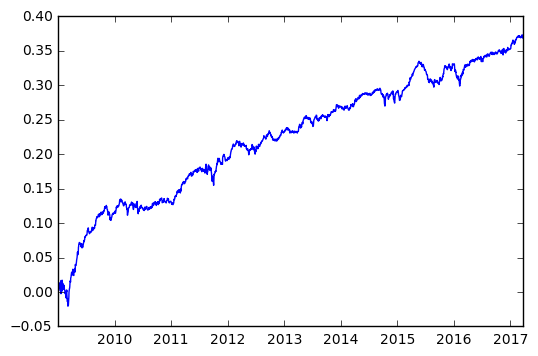

In [47]:
df2 = df.set_index('Date')

plt.figure()
plt.plot(df2.Rets.cumsum())